## Исследование продаж компьютерных игр в Северной Америке, Европе и Японии

Необходимо оценить исторические данные о продажах игр на трех территориях, оценках пользователей и критиков, ЖЦ платформ, выявить определяюшие успешность игры закономерности.

### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы

1. Ознакомиться с данными
2. Выполнить предобработку данных (заменить названия столбцов, преобразовать данных, обработать пропуски, посчитать суммарные продажи по регионам)
3. Провести исследовательский анализ (изучить выпуск игр по годам,  изучить изменения по годам, определить актуальный период, определить лидирующие платформы, определить потенциально прибыльные платформы, определить как влияют отзывы пользователей и критиков на продажи, составить портрет пользователя по регионам,сформулировать и проверить гипотезы)
4. Сформулировать вывод

### 1. Знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data = pd.pead_csv('/datasets/games.csv', sep = ',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вывод:Всего в датасете 16715 строк, 11 колонок. Есть данные о наименовании игр, жанре, платформе, дате релиза, продажах, рейтинге, оценках пользователей и критиков. На первый взгляд есть пропущенные данные в столбцах с оценками пользователей и критиков, год релиза представлен в некорректной форме.

# 2. Подготовьте данные

#### Замените названия столбцов (приведите к нижнему регистру)

In [6]:
data =  data.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release', 'Genre':'genre',\
'NA_sales':'na_sales','EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales','Critic_Score':'critic_score',\
'User_Score':'user_score', 'Rating':'rating'})
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [7]:
data['name']=data['name'].fillna('other')
data_name = data.query('name=="other"')
data['year_of_release']=data['year_of_release'].fillna(0)
data_year = data.query('year_of_release==0')
data['genre'] = data['genre'].fillna('other')
data_genre = data.query('genre=="other"')

print("суммы продаж по пропущенным значениям столбце name", data_name['na_sales'].sum() + data_name['eu_sales'].sum()\
      + data_name['jp_sales'].sum() + data_name['other_sales'].sum())
print("суммы продаж по пропущенным значениям столбце year_of_release", data_year['na_sales'].sum()\
      + data_year['eu_sales'].sum() + data_year['jp_sales'].sum() + data_year['other_sales'].sum())
print("суммы продаж по пропущенным значениям столбце genre", data_genre['na_sales'].sum() + data_genre['eu_sales'].sum()\
      + data_genre['jp_sales'].sum() + data_genre['other_sales'].sum())

суммы продаж по пропущенным значениям столбце name 2.42
суммы продаж по пропущенным значениям столбце year_of_release 98.92
суммы продаж по пропущенным значениям столбце genre 2.42


In [8]:
data = data.dropna(subset=['name', 'genre'])
data = data[(data['name']!='other')&(data['genre']!='other')]
data['rating'] = data['rating'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data.loc[data['user_score']=='tbd', 'user_score']=0

In [9]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

#### Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [10]:
data.duplicated().reset_index(drop=True).sum()

0

In [11]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [12]:
data['summary'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,0,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,0,28.31


Вывод: 
В датасете было всего 16715 строк. Датасет проверен на явные дубликаты и пропущенные значения. В столбце name и genre удалены 2 строки с пропущенными значениями, сумма продаж 2.42 млн. Отказалась от удаления строк с пропущенными значениями в столбце year_of_release, т.к. суммарно продажи принесли 98 млн.

Года привела из float в int. Пропущенные значения в столбцах critic_score и user_score заменила но 0, т.к. скорее всего критики и пользователи не оценивали данные компьютерные игры и привела в тип int столбец critic_score. Пропущенные значения в столбце rating заполнила нулями, т.к. данные это все равно отсутсвующие данные и значит рейтинг им не присвоен. 

При просмотре уникальных значений в столбце с пользовательской оценкой было обнаружено значение 'tbd', по всей видимости означающее ожидаение оценки пользователей. Данное значение устранено заменой данного значения на 0, т.к. если данные по оценкам еще в ожидании, значит на текущий момент оценка пользвателя отсутсвует. 

Добавлен новый столбец summary,  в котором посчитаны (построчно) продажи по каждому продукту по территориям.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  summary          16713 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


# 3. Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [65]:
games_pivot = data.pivot_table(index='year_of_release', values = 'name', aggfunc='count').reset_index()
games_pivot.sort_values(by='year_of_release', ascending = False).head()

,year_of_release,name
37,2016,502
36,2015,606
35,2014,581
34,2013,544
33,2012,653


<Axes: title={'center': 'Количество выпущенных игр'}, xlabel='Годы', ylabel='Количество'>

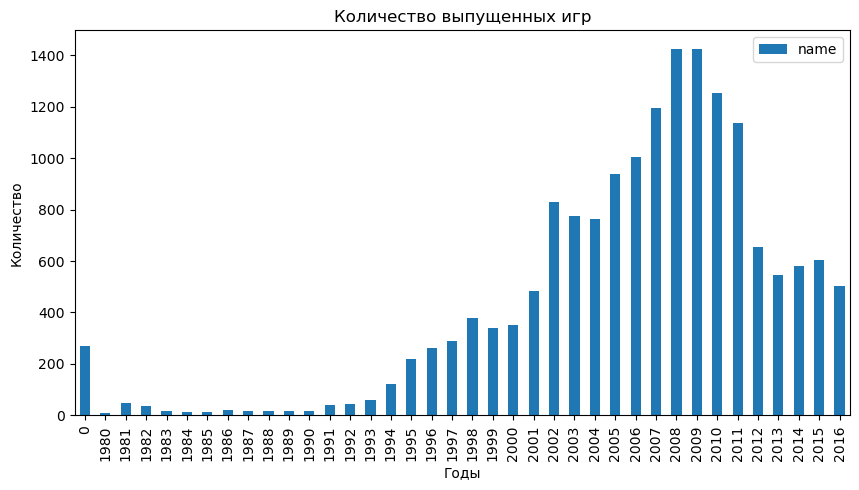

In [15]:
games_pivot.plot(y='name', kind='bar', legend=True, figsize = (10,5), title='Количество выпущенных игр', xlabel='Годы', \
                 ylabel='Количество')

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [66]:
data.groupby('platform').agg({'summary':'sum'}).sort_values(by='summary', ascending=False).reset_index().head()

,platform,summary
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.10


In [68]:
total_pivot = data.pivot_table(index='year_of_release',columns='platform', values='summary', aggfunc='sum')
total_pivot.sort_values(by='year_of_release', ascending=False).head(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2013,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.58,NaN,18.96
2012,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2011,NaN,NaN,63.20,NaN,26.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.65,NaN,143.84,NaN,NaN
2010,NaN,NaN,NaN,NaN,85.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,127.95,NaN,170.03,NaN,NaN
2009,NaN,NaN,NaN,NaN,119.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206.97,NaN,120.29,NaN,NaN
2008,NaN,NaN,NaN,0.04,145.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.32,NaN,135.26,0.18,NaN


In [69]:
year_1985 = data.query('platform=="DS"')
year_1985 = year_1985[year_1985['year_of_release']!=0]
data = data[(data['name']!='Strongest Tokyo University Shogi DS')]
year_1985.sort_values(by='year_of_release', ascending=True).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,0,0.0,0,0.43
13095,Tennis no Oji-Sama: 2005 Crystal Drive,DS,2004,Sports,0.00,0.00,0.05,0.00,0,0.0,0,0.05
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,0,0.0,0,0.08
6580,Polarium,DS,2004,Puzzle,0.13,0.01,0.11,0.01,73,8.4,E,0.26
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,0,0.0,0,0.03


#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

In [19]:
actual_period = data.query('year_of_release>2013').reset_index(drop=True)

Найдем самые прибыльные платформы за актуальный период

In [70]:
actual_period.pivot_table(index='platform', values='summary', aggfunc='sum').sort_values(by='summary',ascending=False).reset_index().head()

,platform,summary
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


In [71]:
popular_platform_pivot = (actual_period
                          .query('platform in ["PS4","XOne","3DS","PS3","X360"]')
                          .pivot_table(index='year_of_release',columns = 'platform', values = 'summary', aggfunc = 'sum'))
popular_platform_pivot

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


Построим диаграмму по популярным платформам

<Axes: title={'center': 'Суммарные продажи по ТОП-5 платформ по годам'}, xlabel='Годы', ylabel='Продажи, в млн.'>

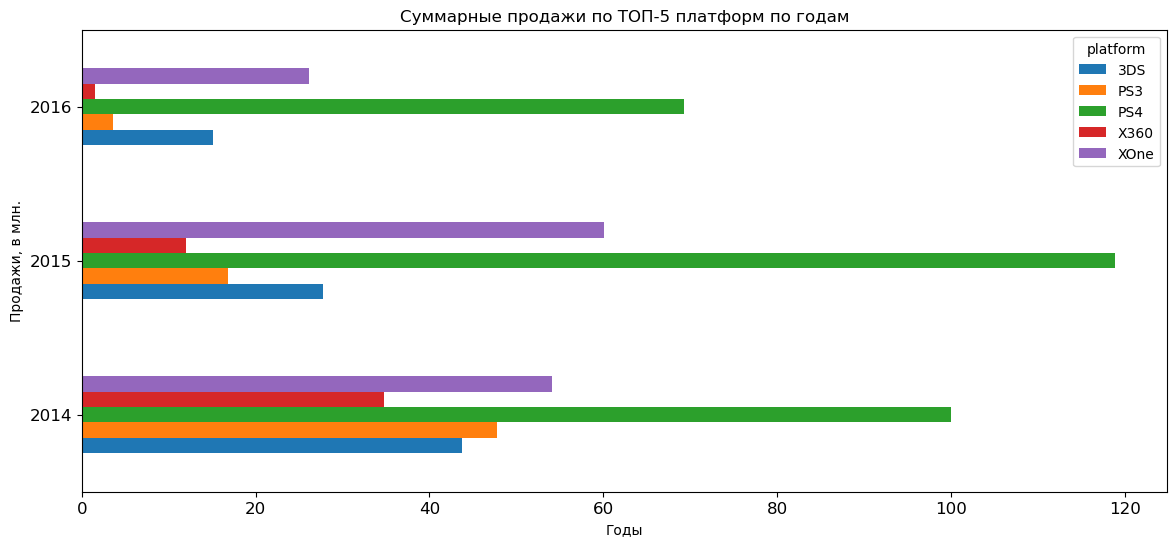

In [22]:
popular_platform_pivot.plot(kind = 'barh', figsize = (14,6), title='Суммарные продажи по ТОП-5 платформ по годам', \
fontsize=12, xlabel='Годы', ylabel= 'Продажи, в млн.')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [72]:
actual_period.pivot_table(index = 'year_of_release', columns = 'platform', values = 'summary', aggfunc = 'sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Суммарные продажи, млн')

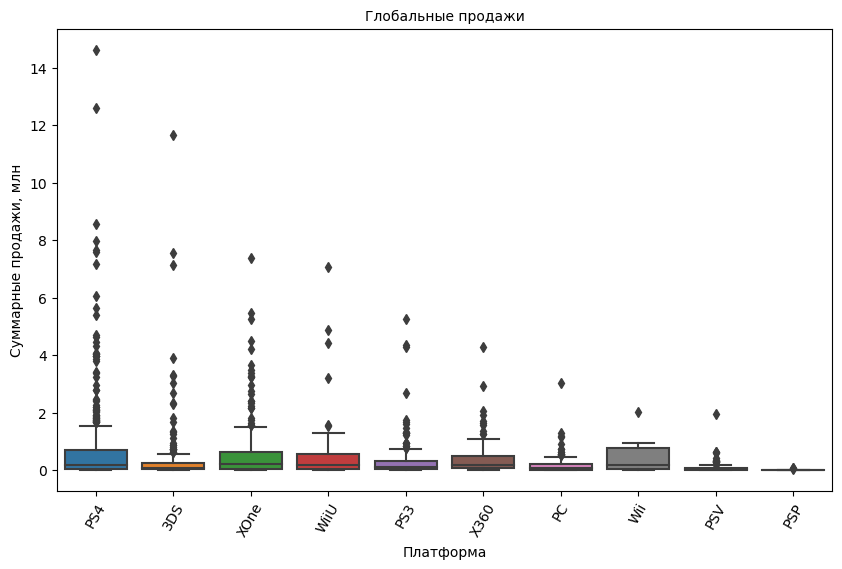

In [24]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=60)
sns.boxplot(data=actual_period, x='platform', y='summary')
plt.title('Глобальные продажи', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Суммарные продажи, млн',fontsize=10)

Text(0, 0.5, 'Суммарные продажи, млн')

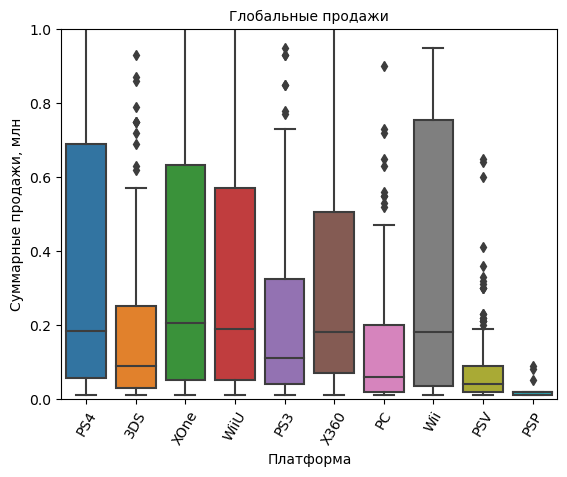

In [25]:
plt.ylim([0,1])
plt.xticks(rotation=60)
sns.boxplot(data=actual_period, x='platform', y='summary'),
plt.title('Глобальные продажи', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Суммарные продажи, млн',fontsize=10)

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

<Axes: title={'center': 'Зависимость продаж по платформе XOne от оценок пользователей'}, xlabel='user_score', ylabel='summary'>

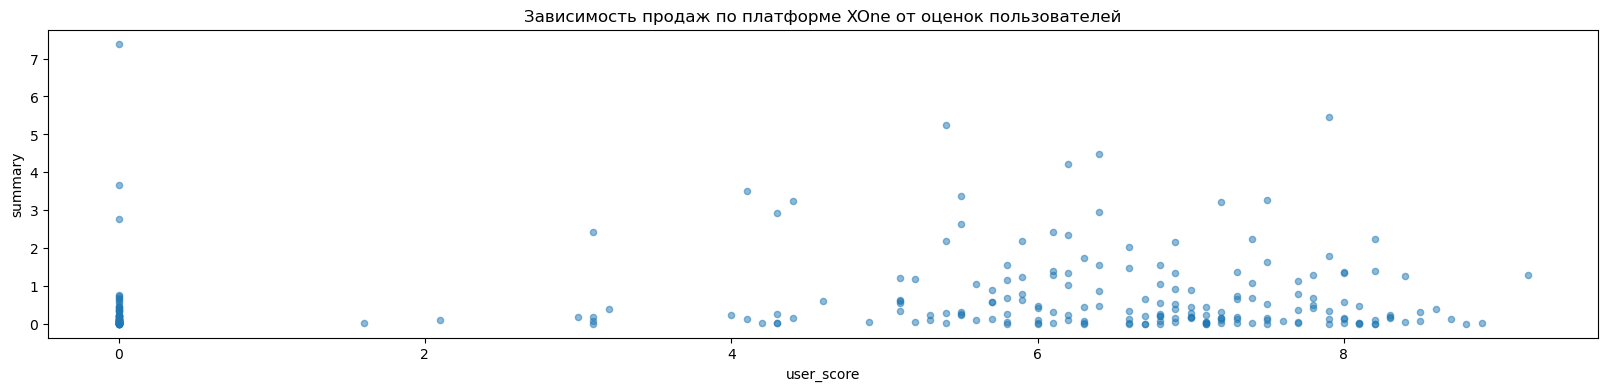

In [73]:
(data.query('platform=="XOne"')
 .plot(x='user_score', y = 'summary', kind = 'scatter',alpha=0.5, legend=True, 
       title='Зависимость продаж по платформе XOne от оценок пользователей', figsize=(20,4)))

<Axes: title={'center': 'Зависимость продаж по платформе XOne от оценок критиков'}, xlabel='critic_score', ylabel='summary'>

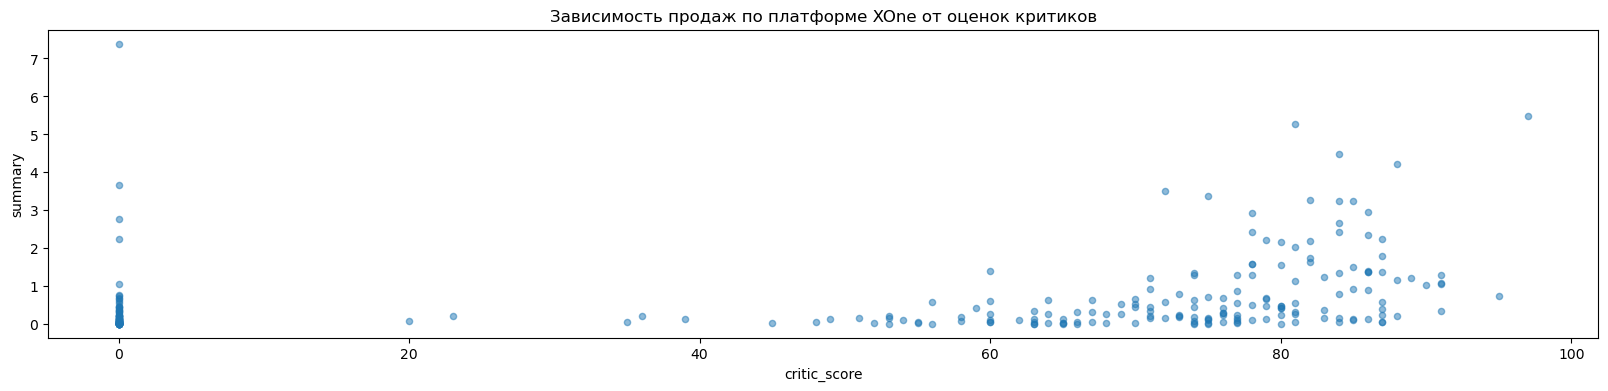

In [74]:
(data.query('platform=="XOne"')
 .plot(x='critic_score', y = 'summary', kind = 'scatter', alpha=0.5, legend=True,figsize=(20,4), 
       title='Зависимость продаж по платформе XOne от оценок критиков'))

In [75]:
cor_data_critic = data.query('platform=="XOne" and critic_score>0 and year_of_release>2012')
summary_to_critic_score =cor_data_critic['summary'].corr(cor_data_critic['critic_score'])
summary_to_critic_score

0.41699832800840153

In [76]:
cor_data_user = data.query('platform=="XOne" and user_score>0 and year_of_release>2012')
summary_to_user_score = cor_data_user['summary'].corr(cor_data_user['user_score'])
summary_to_user_score

-0.06892505328279418

In [30]:
# check
data['critic_score']

0        76
1         0
2        82
3        80
4         0
         ..
16710     0
16711     0
16712     0
16713     0
16714     0
Name: critic_score, Length: 16712, dtype: int32

#### Соотнесите выводы с продажами игр на других платформах.

<Axes: title={'center': 'Зависимость продаж по платформе PS4 от оценок пользователей'}, xlabel='user_score', ylabel='summary'>

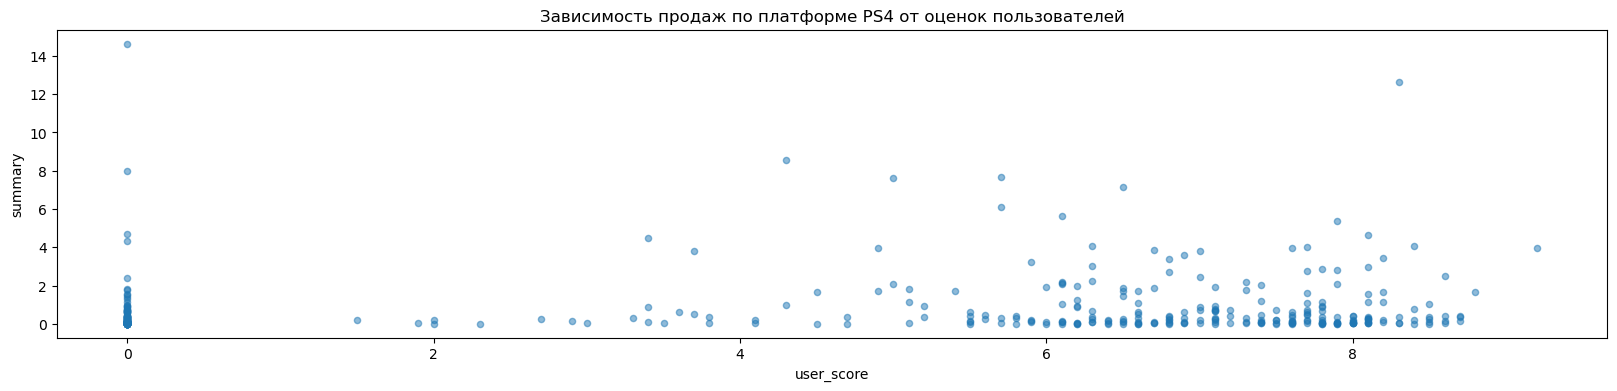

In [77]:
(data.query('platform=="PS4"')
 .plot(x='user_score', y = 'summary', kind = 'scatter', alpha=0.5, legend=True,
      title='Зависимость продаж по платформе PS4 от оценок пользователей', figsize=(20,4)))

<Axes: title={'center': 'Зависимость продаж по платформе PS4 от оценок критиков'}, xlabel='critic_score', ylabel='summary'>

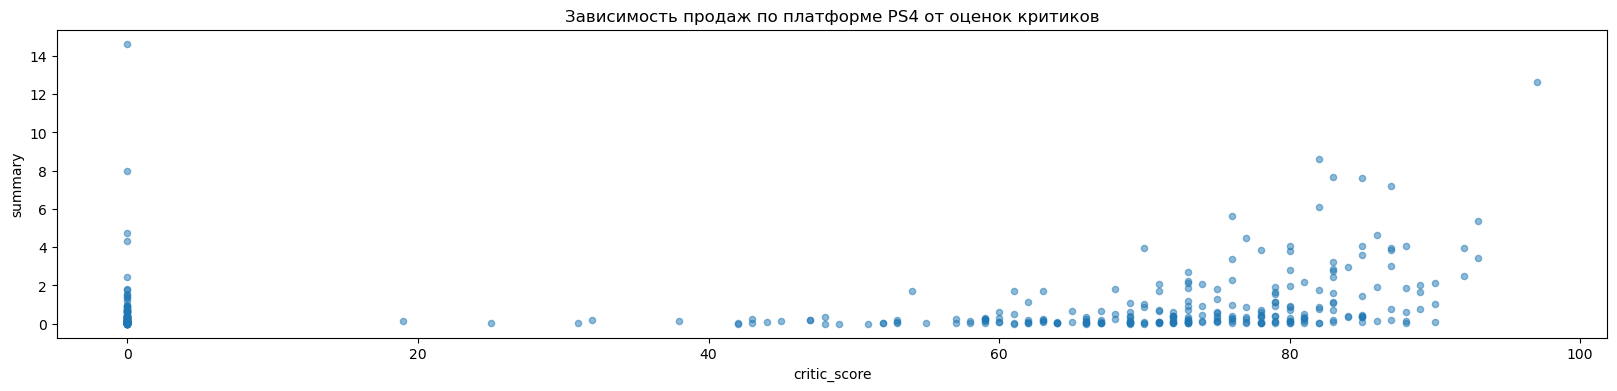

In [78]:
(data.query('platform=="PS4"')
 .plot(x='critic_score', y = 'summary', kind = 'scatter', alpha=0.5, legend=True,
      figsize=(20,4), title='Зависимость продаж по платформе PS4 от оценок критиков'))

In [33]:
platform_PS_four = data.query('platform=="PS4" and critic_score>0 and user_score>0 and year_of_release>2012')
platform_PS_four_summary_to_critic_score = platform_PS_four['summary'].corr(platform_PS_four['critic_score'])
platform_PS_four_summary_to_user_score = platform_PS_four['summary'].corr(platform_PS_four['user_score'])
print(platform_PS_four_summary_to_critic_score)
print(platform_PS_four_summary_to_user_score)

0.40589480145836637
-0.03362497596528881


<Axes: title={'center': 'Зависимость продаж по платформе 3DS от оценок пользователей'}, xlabel='user_score', ylabel='summary'>

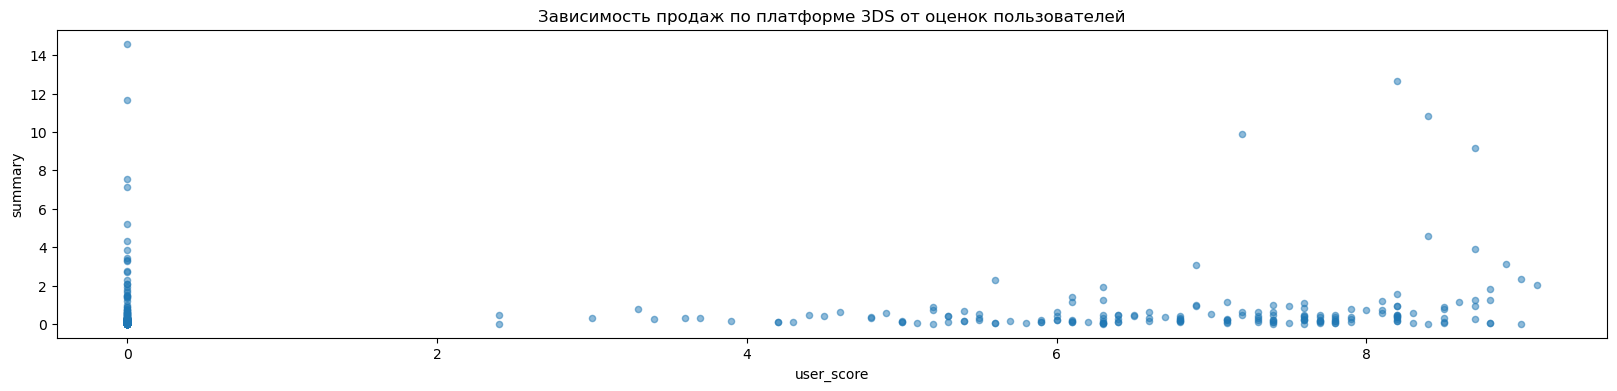

In [79]:
(data.query('platform=="3DS"')
 .plot(x='user_score', y = 'summary', kind = 'scatter', alpha=0.5, legend=True,
      title='Зависимость продаж по платформе 3DS от оценок пользователей', figsize=(20,4)))

<Axes: title={'center': 'Зависимость продаж по платформе 3DS от оценок критиков'}, xlabel='critic_score', ylabel='summary'>

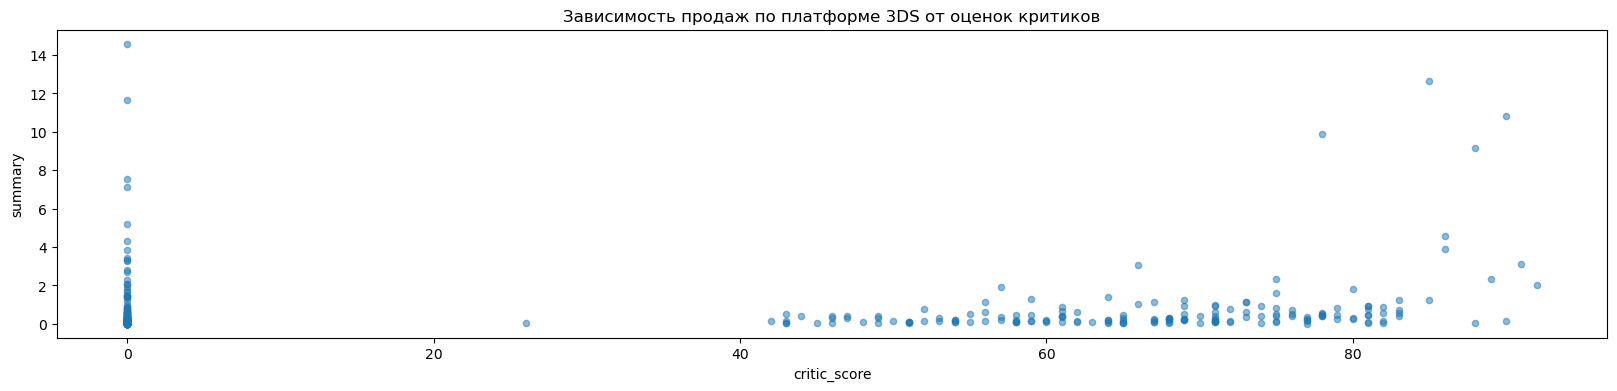

In [80]:
(data.query('platform=="3DS"')
 .plot(x='critic_score', y = 'summary', kind = 'scatter', alpha=0.5, legend=True,
      figsize=(20,4), title='Зависимость продаж по платформе 3DS от оценок критиков'))

In [36]:
platform_3_DS = data.query('platform=="3DS" and critic_score>0 and user_score>0 and year_of_release>2010')
platform_3_DS_summary_to_critic_score = platform_3_DS['summary'].corr(platform_3_DS['critic_score'])
platform_3_DS_summary_to_user_score = platform_3_DS['summary'].corr(platform_3_DS['user_score'])
print(platform_3_DS_summary_to_critic_score)
print(platform_3_DS_summary_to_user_score)

0.33890386446332144
0.2320887223766359


#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
actual_period.pivot_table(index='genre', values='summary', aggfunc='sum').sort_values(by='summary', ascending=False)

,summary
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Text(0, 0.5, 'Суммарные продажи, млн')

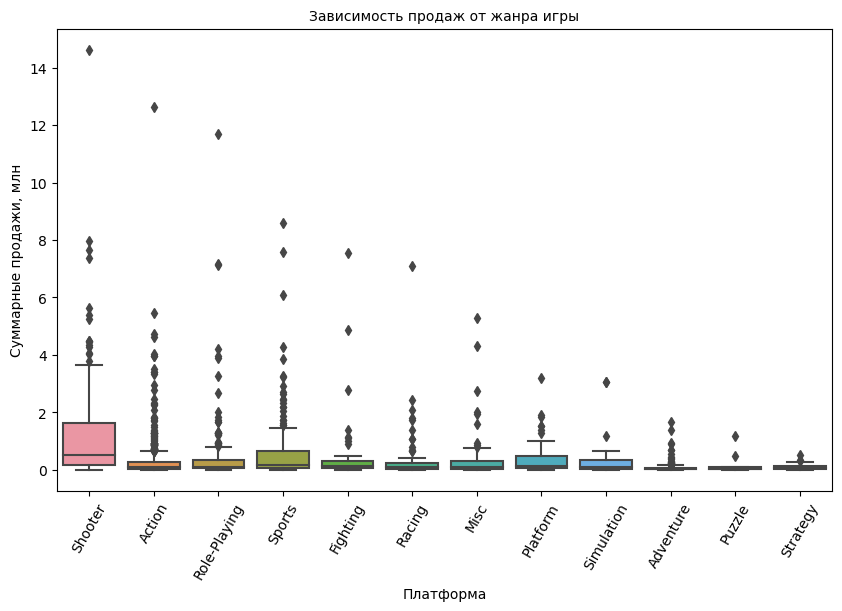

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data=actual_period, x='genre', y='summary')
plt.xticks(rotation=60)
plt.title('Зависимость продаж от жанра игры', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Суммарные продажи, млн',fontsize=10)

Text(0, 0.5, 'Суммарные продажи, млн')

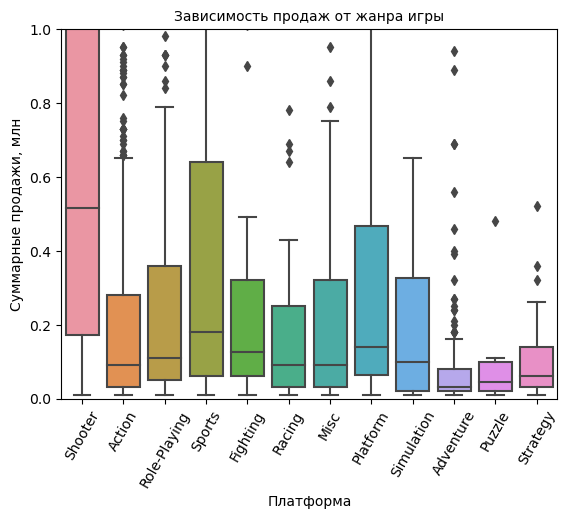

In [39]:
plt.ylim([0,1])
plt.xlim([0,3])
sns.boxplot(data=actual_period, x='genre', y='summary')
plt.xticks(rotation=60)
plt.title('Зависимость продаж от жанра игры', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Суммарные продажи, млн',fontsize=10)

Вывод:

Данные за все периоды несомненно важны, например для оценивания жизненного цикла платформы. Но для определения прогнозов на следующие годы лучше не брать во внимание многолетней давности данные. С 2007 по 2011 в среднем выпускалось 1100-1400 игр, с 2012 по 2015 ориентировочно 500-600. Данные за 2016 не полные, если смотреть на динамику роста, то возможно данные по количеству будут чуть выше. Самые прибыльные платформы за весь период, указанный в датасете период: PS2 (1255.77 млн),X360 (971.42 млн), PS3 (939.65 млн), Wii (907.51), DS (806.12 млн).

Характерный срок появляются новые и исчезают старые платформы примерно каждые три года.
Лидирующие платформы по продажам в актуальном периоде(2014-2016 гг):  3DS, PS3,PS4, X360, XOne за актуальный период.

Можно отметить, что по всем платформам есть выбросы. Например, по PS4 медиана 0,2 млн, 3 квартиль достигает 0,7 млн. Пределы нормальных значений 1,8 -1,9 млн. Выбросы достигают примерно 9 млн. 3DS медиана 0,1 млн. 3 квартиль ограничивается 0,29-03 млн. Пределы нормальных значений примерно 0,6 млн. Выбросы достигают 1 млн. Самые прибыльные платформы 3DS,PS4, XOne- по этим платформам выбросы наиболее максимальные - около 8-14 млн.

На продажи популярной платформы XOne (рассматривала актуальный период) согласно графику рассеяния влияют оценки пользователей(наибольшее распределение лежит в пределах 6-9 баллов) и оценки критиков (от 60 до 90 баллов). Коэффициэнты корреляции по оценкам критиков 0,41, что говорит о несильной зависимости от оценок пользователей. По пользователям коэффициэнт отрицательный, но очень близок к нулю '-0,06'. Судя по коэффициэнту зависимости от оценок пользователей почти нет.

Продажи платформы PS4 также согласно графиков зависят от оценок пользователей и критиков, т.к. большая часть значений лежит от 6-8 баллов(оценки пользователей) и от 60-80 баллов(оценки критиков). Хотя по данной платформе часть значений с 0-ми рейтингами, возможно это платформы/игры с показателем tbd, которые мы заменили на 0. Коэффициэнт корреляции 0,40 говорит (согласно графику) о зависимости роста продаж от оценок критиков.По оценкам пользователей коэффициэнт корреляции отрицательный - '-0,04',близок к нулю, что скорее говорит об отсутсвии взаимосвязи продаж от оценок пользователей, т.к. есть ряд продаж с низкими и нулевыми оценками пользователей, судя по графику.

Продажи платформ 3DS: значения по оценкам пользователей лежат в пределах 6-10 баллов, от 60-80 баллов у критиков. По этой платформе также есть игры/платформы с 0 рейтингом. Коэффициэнты коррекляции 0,28 и 0,27, что также говорит о небольшой зависимости продаж от оценков пользователей/критиков. 

В целом, если ориентироваться на графики, можно сказать, что прожажи по платформам зависят от оценков пользователей/критиков. Чем больше оценка, тем больше продажи.

Самые прибыльные жанры Role-Playing (101.44), Sports(109.48), Shooter (170.94), Action(199.36). Самые низкоприбыльные: Puzzle(2.21), Strategy(3.96) за актуальный период.

Больше всего продаж игр в жанре Action, Shooter, Role-Playing, по ним же есть и выбросы достигающие значений 14 млн. Медианы у Shooter(0.5 млн),у Action (0.1 млн), Role-Playing (0.1 млн). Жанр Sports Достигает по выбрасам 8-10 млн, медиана примерно 0,2 млн. 3-й квартиль достигает примерно 0,2-0,25 млн. Границы нормальноых значений достигают 1,5 млн. 
На мой взгляд более стабильные жанры Shooter, Action, Role-Playing, Sports.

# 4. Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [88]:
na_sales_data = (actual_period
                 .pivot_table(index ='platform', values='na_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='na_sales', ascending=False))

percent_na = actual_period.query('platform in ["PS4","XOne","X360","3DS","PS3"]')

In [89]:
total_na = na_sales_data.head()

In [90]:
na_other = na_sales_data[5:]
total_na = total_na.append({'platform': 'Other', 'na_sales':na_other['na_sales'].sum()}, ignore_index = True)
top_five_na = total_na.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)
top_five_na

C:\Users\Диана\AppData\Local\Temp\ipykernel_388\3910691655.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_na = total_na.append({'platform': 'Other', 'na_sales':na_other['na_sales'].sum()}, ignore_index = True)


,na_sales
platform,
PS4,98.61
XOne,81.27
Other,31.19
X360,28.30
3DS,22.64
PS3,22.05


In [92]:
eu_sales_data = (actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False).
                reset_index())
percent_eu = actual_period.query('platform in ["PS4","XOne","PC","3DS","PS3"]')
total_eu = eu_sales_data.head()

In [93]:
eu_other = eu_sales_data[5:]
total_eu = total_eu.append({'platform':'Other','eu_sales': eu_other['eu_sales'].sum()}, ignore_index=True)
top_five_eu = total_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)
top_five_eu

C:\Users\Диана\AppData\Local\Temp\ipykernel_388\294977363.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_eu = total_eu.append({'platform':'Other','eu_sales': eu_other['eu_sales'].sum()}, ignore_index=True)


,eu_sales
platform,
PS4,130.04
XOne,46.25
Other,34.76
PS3,25.54
PC,17.97
3DS,16.12


In [94]:
jp_sales_data = (actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)
                .reset_index())
percent_jp = actual_period.query('platform in ["PS4","PSV","WiiU","3DS","PS3"]')
total_jp = jp_sales_data.head()

In [95]:
jp_other=jp_sales_data[5:]
total_jp = total_jp.append({'platform':'Other','jp_sales':jp_other['jp_sales'].sum()}, ignore_index = True)
top_five_jp = total_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
top_five_jp

C:\Users\Диана\AppData\Local\Temp\ipykernel_388\1267520798.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_jp = total_jp.append({'platform':'Other','jp_sales':jp_other['jp_sales'].sum()}, ignore_index = True)


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
Other,0.76


In [43]:
sum_na = sum(actual_period['na_sales'])
sum_top_five_na=sum(percent_na['na_sales'])
percentage_na = (sum_top_five_na/sum_na)*100

sum_eu = sum(actual_period['eu_sales'])
sum_top_five_eu=sum(percent_eu['eu_sales'])
percentage_eu = (sum_top_five_eu/sum_eu)*100

sum_jp = sum(actual_period['jp_sales'])
sum_top_five_jp=sum(percent_jp['jp_sales'])
percentage_jp = (sum_top_five_jp/sum_jp)*100


print(f'TOP-5 sales in USA {percentage_na}')
print(f'TOP-5 sales in Europe {percentage_eu}')
print(f'TOP-5 sales in Japan {percentage_jp}')

TOP-5 sales in USA 89.0199253678812
TOP-5 sales in Europe 87.15826806561363
TOP-5 sales in Japan 99.18358577720484


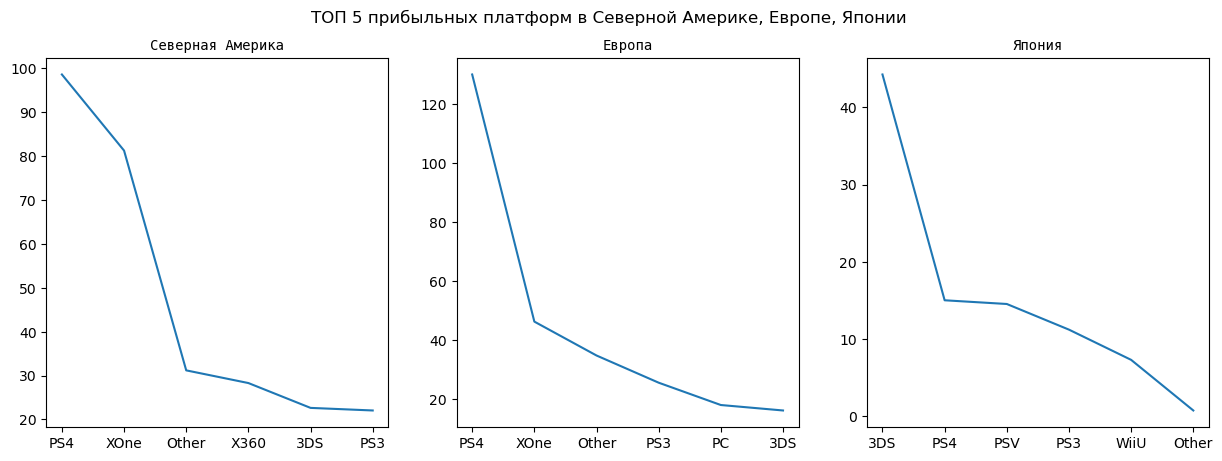

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex = False, sharey=False)

fig.suptitle('ТОП 5 прибыльных платформ в Северной Америке, Европе, Японии')

axs[0].plot(top_five_na)
axs[0].set_title('Северная Америка', fontfamily='monospace', fontstyle='normal', fontsize=10)
axs[1].plot(top_five_eu)
axs[1].set_title('Европа', fontfamily='monospace', fontstyle='normal', fontsize=10)
axs[2].plot(top_five_jp)
axs[2].set_title('Япония', fontfamily='monospace', fontstyle='normal', fontsize=10)

fig.set_figwidth(15)

plt.show()

In [45]:
# check
(
    data
    .query('year_of_release > 2013')
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


<Axes: title={'center': 'Продажи по платформам в Японии'}, xlabel='platform'>

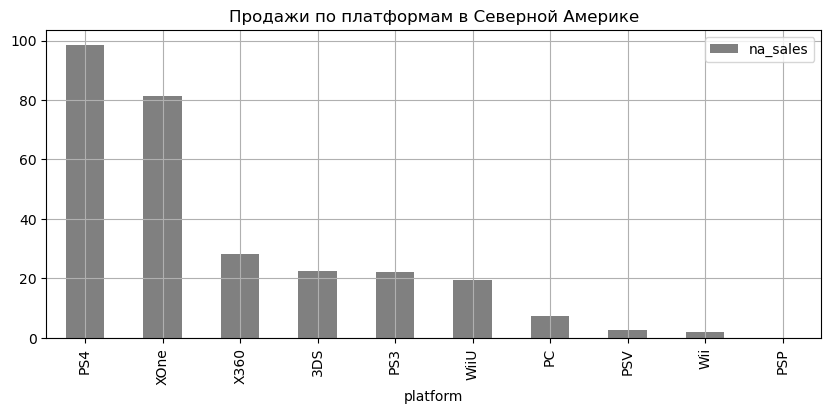

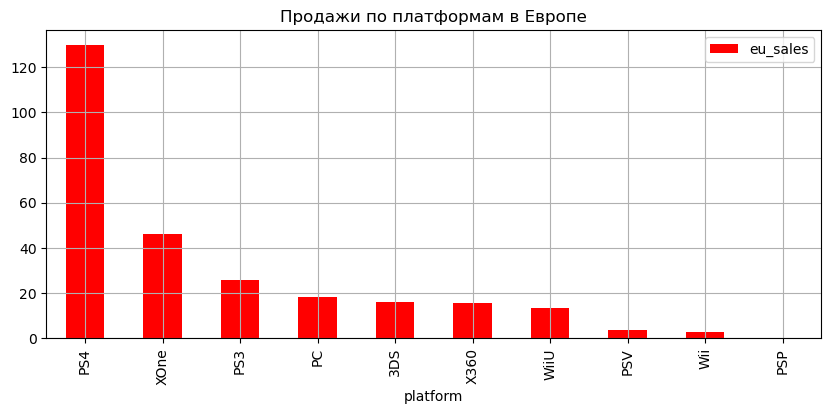

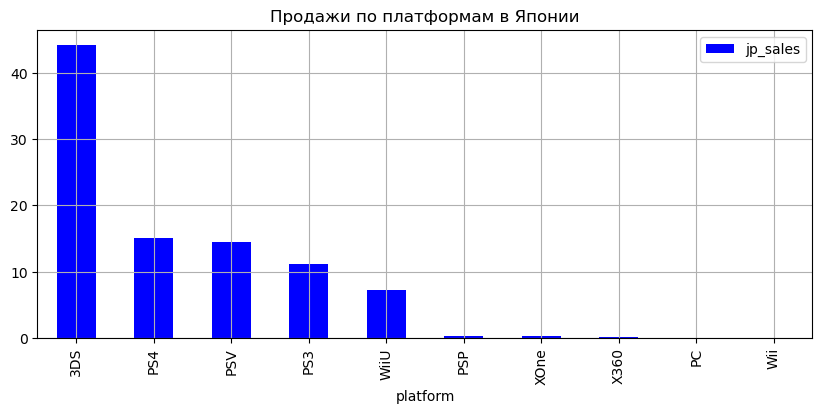

In [47]:
na_sales_data.plot(y='na_sales', kind='bar', grid = True, legend=True, color='grey', \
                   figsize = (10,4), title=('Продажи по платформам в Северной Америке'))
eu_sales_data.plot(y='eu_sales', kind='bar', grid = True, legend=True, color='red', \
                   figsize = (10,4),  title=('Продажи по платформам в Европе'))
jp_sales_data.plot(y='jp_sales', kind='bar', grid = True, legend=True, color='blue', \
                   figsize = (10,4), title=('Продажи по платформам в Японии'))

#### Самые популярные жанры (топ-5). Поясните разницу.

In [48]:
na_sales_genre_pivot = actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)

total_genre_na = pd.DataFrame([['Shooter',79.02],
                                 ['Action',72.53],
                                 ['Sports',46.13],
                                 ['Role-Playing',33.47],
                                 ['Misc',15.05]], columns = ['genre', 'na_sales'])
other_genre_na = na_sales_genre_pivot[5:]
total_genre_na = total_genre_na.append({'genre':'Other', 'na_sales':other_genre_na['na_sales'].sum()}, ignore_index=True)
top_five_genre_na = total_genre_na.pivot_table(index='genre', values='na_sales', aggfunc='sum')
top_five_genre_na

C:\Users\Диана\AppData\Local\Temp\ipykernel_388\3845094705.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_genre_na = total_genre_na.append({'genre':'Other', 'na_sales':other_genre_na['na_sales'].sum()}, ignore_index=True)


,na_sales
genre,
Action,72.53
Misc,15.05
Other,37.86
Role-Playing,33.47
Shooter,79.02
Sports,46.13


In [49]:
eu_sales_genre_pivot = actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

total_genre_eu = pd.DataFrame([['Action',74.68],
                                 ['Shooter', 65.52],
                                 ['Sports', 45.73],
                                 ['Role-Playing', 28.17],
                                 ['Racing',14.13]], columns = ['genre', 'eu_sales'])
other_genre_eu = eu_sales_genre_pivot[5:]
total_genre_eu = total_genre_eu.append({'genre':'Other', 'eu_sales':other_genre_eu['eu_sales'].sum()}, ignore_index=True)
top_five_genre_eu = total_genre_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
top_five_genre_eu

C:\Users\Диана\AppData\Local\Temp\ipykernel_388\2970101953.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_genre_eu = total_genre_eu.append({'genre':'Other', 'eu_sales':other_genre_eu['eu_sales'].sum()}, ignore_index=True)


,eu_sales
genre,
Action,74.68
Other,42.45
Racing,14.13
Role-Playing,28.17
Shooter,65.52
Sports,45.73


In [50]:
jp_sales_genre_pivot = actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
total_genre_jp = pd.DataFrame([['Role-Playing',31.16],
                                 ['Action',29.58],
                                 ['Fighting',6.37],
                                 ['Misc',5.61],
                                 ['Shooter',4.87]], columns = ['genre', 'jp_sales'])
other_genre_jp = jp_sales_genre_pivot[5:]
total_genre_jp = total_genre_jp.append({'genre':'Other', 'jp_sales':other_genre_jp['jp_sales'].sum()}, ignore_index=True)
top_five_genre_jp = total_genre_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
top_five_genre_jp

C:\Users\Диана\AppData\Local\Temp\ipykernel_388\1700893818.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_genre_jp = total_genre_jp.append({'genre':'Other', 'jp_sales':other_genre_jp['jp_sales'].sum()}, ignore_index=True)


,jp_sales
genre,
Action,29.58
Fighting,6.37
Misc,5.61
Other,15.50
Role-Playing,31.16
Shooter,4.87


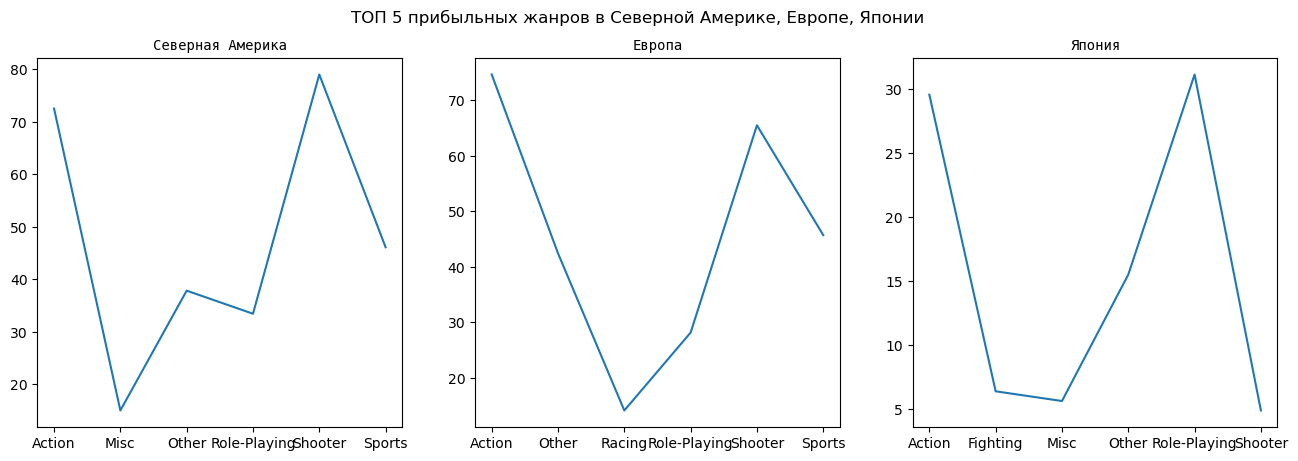

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex = False, sharey=False)

fig.suptitle('ТОП 5 прибыльных жанров в Северной Америке, Европе, Японии')

axs[0].plot(top_five_genre_na)
axs[0].set_title('Северная Америка', fontfamily='monospace', fontstyle='normal', fontsize=10)
axs[1].plot(top_five_genre_eu)
axs[1].set_title('Европа', fontfamily='monospace', fontstyle='normal', fontsize=10)
axs[2].plot(top_five_genre_jp)
axs[2].set_title('Япония', fontfamily='monospace', fontstyle='normal', fontsize=10)

fig.set_figwidth(16)

plt.show()

<Axes: title={'center': 'ТОП-5 жанров в Японии'}, xlabel='genre'>

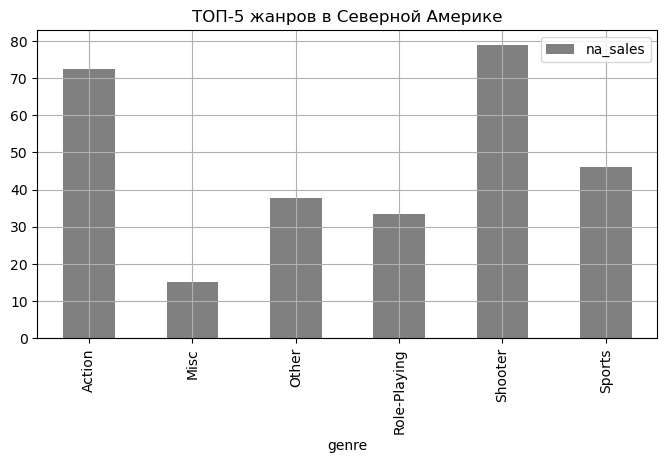

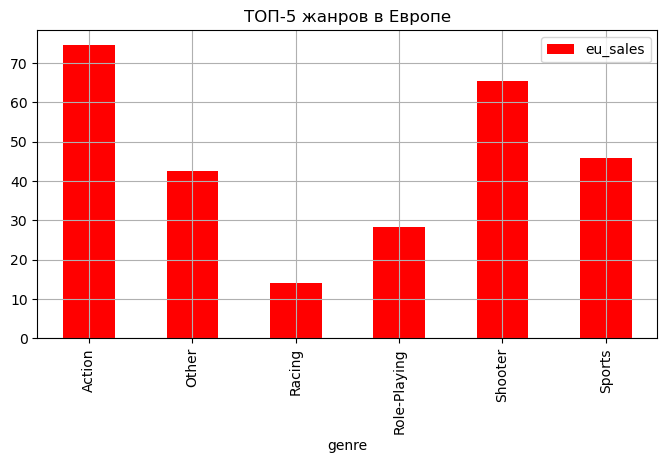

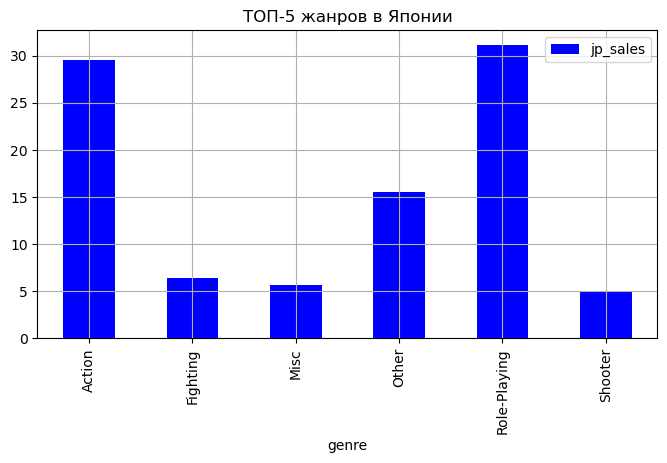

In [52]:
top_five_genre_na.plot(y='na_sales', kind='bar', grid = True, legend=True, color='grey', \
                       figsize = (8,4), title=('ТОП-5 жанров в Северной Америке'))
top_five_genre_eu.plot(y='eu_sales', kind='bar', grid = True, legend=True, color='red',\
                       figsize = (8,4), title=('ТОП-5 жанров в Европе'))
top_five_genre_jp.plot(y='jp_sales', kind='bar', grid = True, legend=True, color='blue', \
                       figsize = (8,4), title=('ТОП-5 жанров в Японии'))

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [96]:
na_sales_rating_pivot = (actual_period.pivot_table(index='rating', values='na_sales', aggfunc='sum')
                         .sort_values(by='na_sales', ascending=False)
                         .reset_index())
na_sales_rating_pivot

,rating,na_sales
0,M,96.42
1,0,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


<Axes: xlabel='rating'>

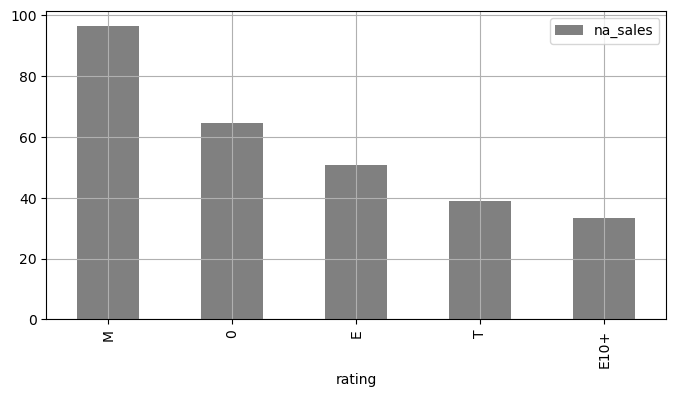

In [54]:
na_sales_rating_pivot.plot(y='na_sales', kind='bar', grid = True, legend=True, color='grey', figsize = (8,4))

In [55]:
eu_sales_rating_pivot = actual_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)
eu_sales_rating_pivot

,eu_sales
rating,
M,93.44
0,58.95
E,58.06
T,34.07
E10+,26.16


<Axes: xlabel='rating'>

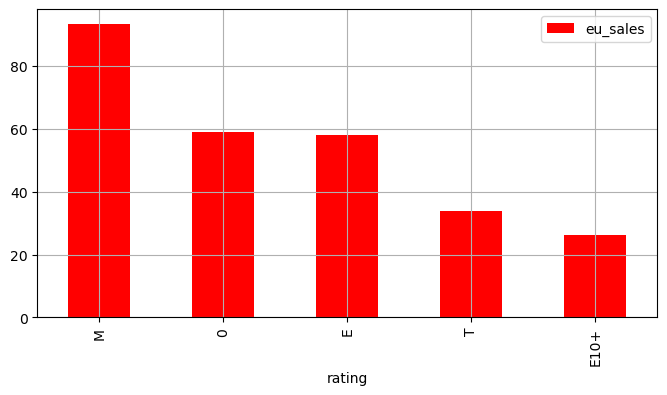

In [56]:
eu_sales_rating_pivot.plot(y='eu_sales', kind='bar', grid = True, legend=True, color='red', figsize = (8,4))

In [57]:
jp_sales_rating_pivot = actual_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)
jp_sales_rating_pivot

,jp_sales
rating,
0,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


<Axes: xlabel='rating'>

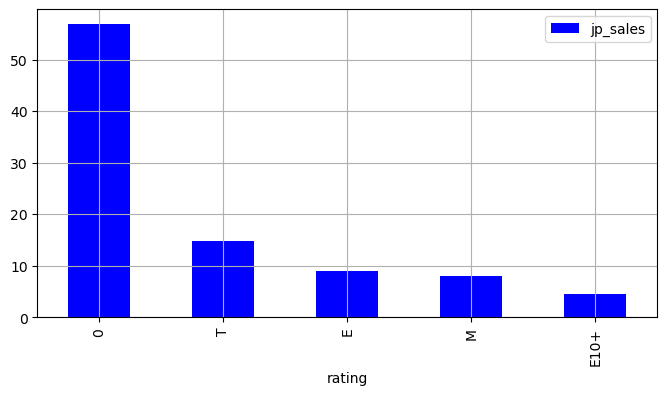

In [58]:
jp_sales_rating_pivot.plot(y='jp_sales', kind='bar', grid = True, legend=True, color='blue', figsize = (8,4))

Вывод:

Можно отметить, что самые популярные платформы на всех трех территориях PS4(Северная Америка и Европа - 1 место, Япония - 2) и Xone. Лидирующие жанры в Европе и Северной Америке Shooter и Action, в Японии же Role-Playing и Action.

По платформам:
ТОП-5 прибыльных платформ в Северной Америке PS4(98.61),XOne(81.27),X360(28.30),
3DS(2.64),PS3(22.05),другие платформы - 31.19
ТОП-5 прибыльных платформ в Европе PS4(130.04), XOne(46.25), PS3(25.54), PC(17.97), 3DS(16.12), другие платформы - 34.76
ТОП 5 прибыльных платформ в Японии 3DS(44.24), PS4(15.02), PSV(14.54), PS3(11.22),WiiU(7.31), другие платформы - 0.76

За актуальный период ТОП 5 платформ в США приносят 89% прибыли от всех продаж, ТОП 5 в Европе - 87%, в Японии - 99%.

Сравнение по продажам платформ по ТОП 5 в разных регионах можно увидеть на графике.

По жанрам:
Самые популярные жанры игр в Северной Америке Shooter(79.02), Action(72.53), Sports(46.13), Role-Playing(33.47), Misc(15.05), другие жанры 37.86
Самые популярные жанры в Европе Action(74.68), Shooter(65.52), Sports(45.73),Role-Playing(28.17), Racing(14.13), другие жанры 42.45
Самые популярные жанры в Японии Role-Playing(31.16),Action(29.58), Fighting	(6.37), Misc(5.61), Shooter(4.87), другие жанры 15.50


По рейтингам:
Рейтинг имеют влияние на продажи, но утверждать это на 100% нельзя, т.к. в данном столбце были пропуски и рейтинги были заполнены не по всем строчкам. Но можно сказать, что рейтинг Е, Т и М одни из самых популярных. Но также продажи без указанного рейтинга большую долю во всех трех регионах.

# 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

In [59]:
xone = data.query('platform=="XOne" and user_score!=0')['user_score']
pc = data.query('platform=="PC" and user_score!=0')['user_score'] 
    
results = st.ttest_ind(xone, pc)
alpha = 0.05

print(results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3896435533548819e-05
Отвергаем нулевую гипотезу


In [62]:
action = data.query('genre=="Action" and user_score!=0')['user_score']
sports = data.query('genre=="Sports" and user_score!=0')['user_score']

results = st.ttest_ind(action, sports)

print(results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


1. Нулевая гипотеза: Средние пользовательские рейтинги за актуальный период по платформам XOne и PC равны. Альтернативная: Средние пользовательские рейтинги за актуальный период по платформам XOne и PC не равны.
2. Нулевая гипотеза: Средние пользовательские рейтинги за актуальный период по жанрам Actual и Sports равны. Альтернативная: Средние пользовательские рейтинги за актуальный период по жанрам Actual и Sports не равны.

Использовала метод st.ttest_ind, т.к. с помощью данного метода проверить гипотезу о равенстве среднего двух генеральных совокупностей.

Результат:
1. Отвергаем нулевую гипотезу, что средние пользовательские рейтинги по платформам равны, т.к. при полученном значении вероятность равности рейтингов достаточно мала.

2. Не получилось отвергнуть нулевую гипотезу о равности рейтингов пользователей по двум жанрам, что не говорит о том, что рейтинги одинаковые, вероятность случайно получить различие равно 10%.

# 6. Напишите общий вывод

Исследовали датасет с продажами, оценками пользователей и критиков. В Датасете содержалось 16715, небольшая часть данных была  удалена, на показатели по продажам имеет минимальное влияние, в связи с отсутсвием данных по наименованию. Пропуски в стобцах с пользовательской оценкой и оценкой критиков были замены на "0", т.к. данные числовые. Отсутствие данных произошло скорее всего из-за того, что на текущий момент оценки пользователей/критиков не было. 

Определила актуальный период - с 2014 за 2016 гг, т.к. сфера компьютерных игр является динамично развивающейся. 

Лидирующие платформы по продажам в актуальном периоде(2014-2016 гг): 3DS, PS3,PS4, X360, XOne за актуальный период.
Оценки критиков и пользователей вляют на продажи, но о сильной взаимосвязи говорить нельзя.Наблюдения по взаимосвязи прибыли и рейтингов польователей и критиков:
*более продаваемые игры с оценкмами от 60, по пользователям от 5. Хотя достаточные продажи также имеются с 0-ми оценками пользователей и критиков. 
*Предполагаю, что при замене данных в столбце с пользовательской оценкой (tbd) данные находятся в процессе загрузки.

Рейтинги Е, Т и М одни из самых популярных. Но также продажи без указанного рейтинга большую долю во всех трех регионах.

Анализ по портрету клиента по трем регионам

**Северная Америка

*ТОП-5 прибыльных платформ (2014-2016 гг):
PS4(98.61 млн), XOne(81.27 млн), X360(28.30 млн), 3DS(2.64 млн),PS3(22.05 млн), другие платформы - 31.19  млн.
*ТОП-5 прибыльных жанром: 
Shooter(79.02), Action(72.53), Sports(46.13), Role-Playing(33.47), Misc(15.05), другие жанры 37.86 

**Европа

*ТОП-5 прибыльных платформ (2014-2016 гг):
PS4(130.04 млн), XOne(46.25 млн), PS3(25.54 млн), PC(17.97 млн), 3DS(16.12 млн), другие платформы - 34.76 млн
*ТОП-5 прибыльных жанром: 
Action(74.68 млн), Shooter(65.52 млн), Sports(45.73 млн),Role-Playing(28.17 млн), Racing(14.13 млн), другие жанры 42.45 млн

**Япония

*ТОП-5 прибыльных платформ (2014-2016 гг):
3DS(44.24 млн), PS4(15.02 млн), PSV(14.54 млн), PS3(11.22 млн), WiiU(7.31 млн), другие платформы - 0.76 млн
*ТОП-5 прибыльных жанром:
Role-Playing(31.16 млн),Action(29.58 млн), Fighting (6.37 млн), Misc(5.61 млн), Shooter(4.87 млн), другие жанры 15.50 млн

Самые прибыльные платформы за весь период, указанный в датасете период: PS2 (1255.77 млн),X360 (971.42 млн), PS3 (939.65 млн), Wii (907.51), DS (806.12 млн).


Не все указанные показатели влияют на продажи, например, рейтинг. В связи с тем, что часть данных отсутствовала, нельзя точно проанализировать как именно он влияет на прродажи. А по жанрам, территориям, оценкам пользователей и критиков - можно спрогнозировать, что принесет больше прибыли. 


Можно отметить, что по всем платформам есть "выбросы". Например, по PS4 медиана 0,2 млн, 3 квартиль достигает 0,7 млн. Пределы нормальных значений 1,8 -1,9 млн. Выбросы достигают примерно 9 млн. 3DS медиана 0,1 млн. 3 квартиль ограничивается 0,29-03 млн. Пределы нормальных значений примерно 0,6 млн. Выбросы достигают 1 млн. Самые прибыльные платформы 3DS,PS4, XOne- по этим платформам выбросы наиболее максимальные - около 8-14 млн.

Лидирующие платформы по продажам в актуальном периоде(2014-2016 гг): 3DS(86.88), PS3(68.18),PS4(288.15), X360(48.22), XOne(140.36) за актуальный период.

Самые прибыльные жанры Role-Playing (101.44), Sports(109.48), Shooter (170.94), Action(199.36). Самые низкоприбыльные: Puzzle(2.21), Strategy(3.96) за актуальный период.

% продаж актуальных платформ от всех в Северной Америке в 2014-2016гг составляет 89.01%
% продаж актуальных платформ от всех в Европе в 2014-2016гг составляет 87.15%
% продаж актуальных платформ от всех в Японии в 2014-2016 гг составляет 99.18%
